

## Generate Training Data


In [1]:
import numpy as np

# 10,000 random values between -1 and 1
u = np.random.uniform(-1, 1, 10_000)

# 
x_m = 243.5 * u - 162


## Define the Neuron

In [2]:
def activation_func(z):
    return z

def neuron(u, w, b):
    z = u * w + b
    x = activation_func(z)
    return x
    
def loss_func(x, x_m):
    return (x - x_m) ** 2

In [3]:
def train(start_w, start_b, u_set, x_m_set, learning_rate=0.01, epochs=10000):
    w = start_w
    b = start_b
    loss_history = []
    
    for epoch in range(epochs):
        u = u_set[epoch % len(u_set)]
        x_m = x_m_set[epoch % len(x_m_set)]

        # forward prop
        x = neuron(u, w, b)
        loss = loss_func(x, x_m)
        loss_history.append(loss)

        # backprop
        grad_w = 2 * (x - x_m) * u
        grad_b = 2 * (x - x_m)

        w -= learning_rate * grad_w
        b -= learning_rate * grad_b
    
    return w, b, loss_history

# Training

In [4]:
# init random
start_w = np.random.uniform(-1, 1)
start_b = np.random.uniform(-1, 1)

w, b, loss_history = train(start_w, start_b, u, x_m, learning_rate=0.0001, epochs=1000000)

print(f"Trained weight: {w}, bias: {b}")
print(f"Final loss: {loss_history[-1]:.4f}")

Trained weight: 243.49999999992897, bias: -162.0
Final loss: 0.0000


In [5]:
import matplotlib.pyplot as plt

def show_loss(loss_history):

    plt.figure(figsize=(10, 6))
    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Over Time During Training')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')  # Log scale helps visualize the convergence better
    plt.show()

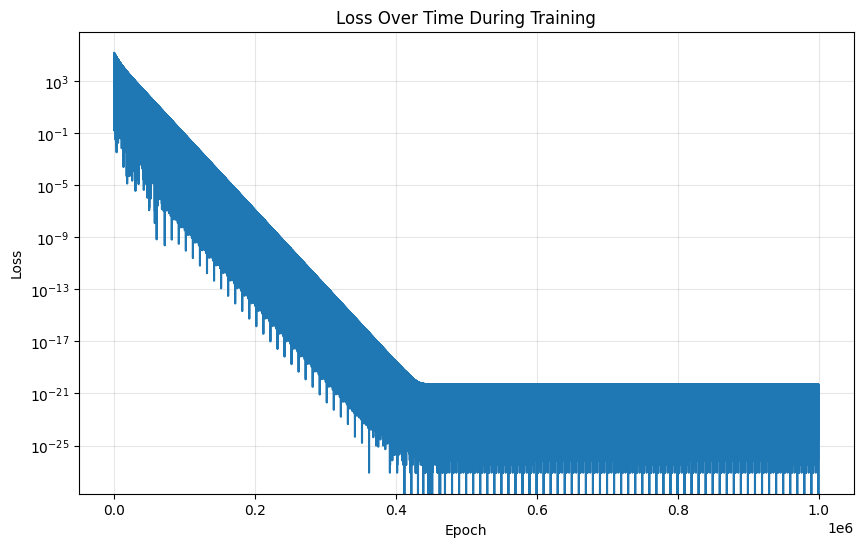

In [6]:
show_loss(loss_history)

# Execution

In [7]:
test_data = 3
output = neuron(test_data, w, b)
print(f"{test_data} => {output}")

3 => 568.499999999787


## Alternative

In [8]:
x_m = 2 * (u**2) + 1

# init random
start_w = np.random.uniform(-1, 1)
start_b = np.random.uniform(-1, 1)

w, b, loss_history = train(start_w, start_b, u, x_m)

print(f"Trained weight: {w}, bias: {b}")
print(f"Final loss: {loss_history[-1]:.4f}")

Trained weight: -0.0020762914423471113, bias: 1.7027938196504904
Final loss: 0.4720


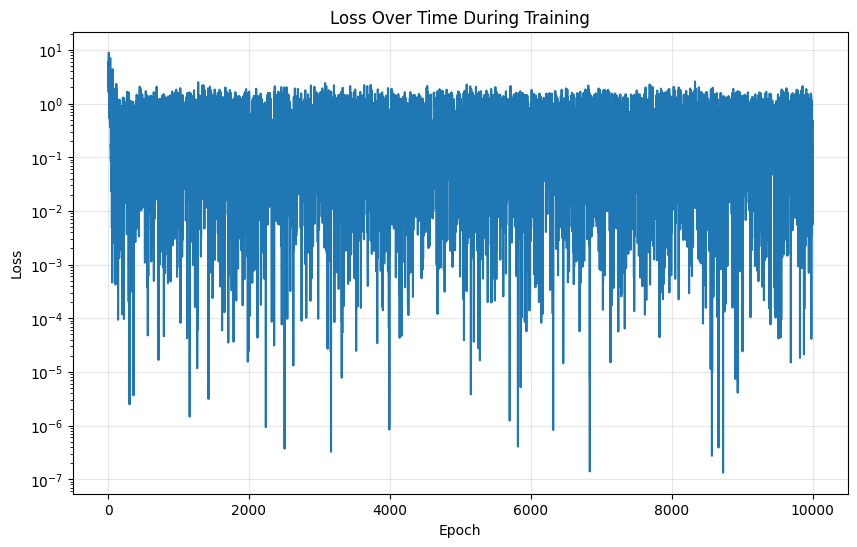

In [9]:
show_loss(loss_history)